In [66]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter

In [ ]:
dir_dataset = r"C:\Users\USER\Desktop\Projects\PASD_Deteksi_Penyakit_Tanaman\Dataset_Classification\raw"

In [68]:
for folder in os.listdir(dir_dataset):
    print(folder)

Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___healthy
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_mosaic_virus
Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [69]:
folders = os.listdir(dir_dataset)
file_counts = [len(os.listdir(f"{dir_dataset}/{folder}")) for folder in folders]
for folder in folders:
    print(folder, ":", len(os.listdir(f"{dir_dataset}/{folder}")))

Tomato___Bacterial_spot : 2127
Tomato___Early_blight : 1000
Tomato___healthy : 1591
Tomato___Late_blight : 1909
Tomato___Leaf_Mold : 952
Tomato___Septoria_leaf_spot : 1771
Tomato___Spider_mites Two-spotted_spider_mite : 1676
Tomato___Target_Spot : 1404
Tomato___Tomato_mosaic_virus : 373
Tomato___Tomato_Yellow_Leaf_Curl_Virus : 5357


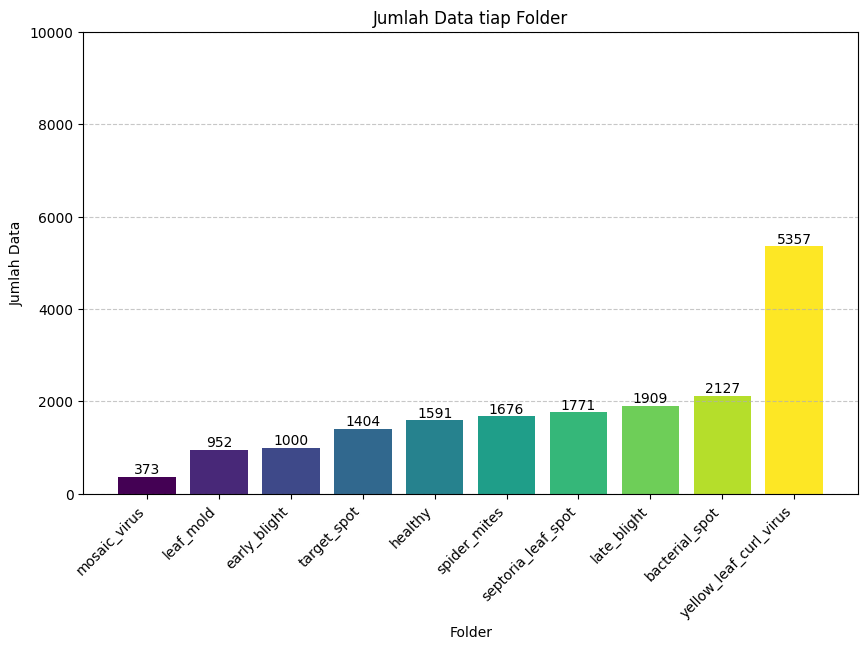

In [ ]:
folders = os.listdir(dir_dataset)
file_counts = [len(os.listdir(f"{dir_dataset}/{folder}")) for folder in folders]

folders = [folder.split("___")[1] for folder in folders]
folders = [folder.split(" ")[0] for folder in folders]
folders = [folder.replace("Tomato_", "") for folder in folders]
folders = [folder.lower() for folder in folders]

sorted_folders, sorted_file_counts = zip(*sorted(zip(folders, file_counts), key=lambda x: x[1]))

colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_folders)))

plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_folders, sorted_file_counts, color=colors)

for bar, count in zip(bars, sorted_file_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), 
            ha='center', va='bottom', fontsize=10)

plt.xlabel("Folder")
plt.ylabel("Jumlah Data")
plt.title("Jumlah Data tiap Folder")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 10000)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [71]:
df = pd.DataFrame(columns=["file_name", "label"])

for folder in os.listdir(dir_dataset):
    for file in os.listdir(f"{dir_dataset}/{folder}"):
        df = pd.concat([df, pd.DataFrame({"file_name": [file], "label": [folder]})], ignore_index=True)

df

,file_name,label
0,00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_B...,Tomato___Bacterial_spot
1,0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_B...,Tomato___Bacterial_spot
2,00639d29-2d1a-4fcf-9bd3-a2b3109c74c4___UF.GRC_...,Tomato___Bacterial_spot
3,00728f4d-83a0-49f1-87f8-374646fcda05___GCREC_B...,Tomato___Bacterial_spot
4,00a7c269-3476-4d25-b744-44d6353cd921___GCREC_B...,Tomato___Bacterial_spot
...,...,...
18155,ffb295c9-f14e-4a15-831a-bf905da7fcb6___UF.GRC_...,Tomato___Tomato_Yellow_Leaf_Curl_Virus
18156,ffe08ccc-c55e-4ca2-9234-2906b98b8d05___YLCV_NR...,Tomato___Tomato_Yellow_Leaf_Curl_Virus
18157,ffe996e5-c8dc-47b7-bca2-4fc25e5ac57c___UF.GRC_...,Tomato___Tomato_Yellow_Leaf_Curl_Virus
18158,fff42f1b-7ec4-46e3-9269-45932e63635e___YLCV_GC...,Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [72]:
display(
    len(df["label"].value_counts()),
    df["label"].value_counts()
)

10

label
Tomato___Tomato_Yellow_Leaf_Curl_Virus           5357
Tomato___Bacterial_spot                          2127
Tomato___Late_blight                             1909
Tomato___Septoria_leaf_spot                      1771
Tomato___Spider_mites Two-spotted_spider_mite    1676
Tomato___healthy                                 1591
Tomato___Target_Spot                             1404
Tomato___Early_blight                            1000
Tomato___Leaf_Mold                                952
Tomato___Tomato_mosaic_virus                      373
Name: count, dtype: int64

In [73]:
len(df)

18160

In [ ]:
from PIL import Image

image_path = r"C:\Users\USER\Desktop\Projects\PASD_Deteksi_Penyakit_Tanaman\Dataset_Classification\raw\Tomato___Bacterial_spot\443242bf-ad63-440d-89bd-cb11c2fc1e51___UF.GRC_BS_Lab Leaf 0874.JPG"
img = Image.open(image_path)

image_size = img.size
image_mode = img.mode
image_format = img.format

print(f"Image Size: {image_size} (Width x Height)")
print(f"Color Format (Mode): {image_mode}")
print(f"Image Format: {image_format}")
print(f"Image Info: {img.info}")

Image Size: (256, 256) (Width x Height)
Color Format (Mode): RGB
Image Format: JPEG
Image Info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}


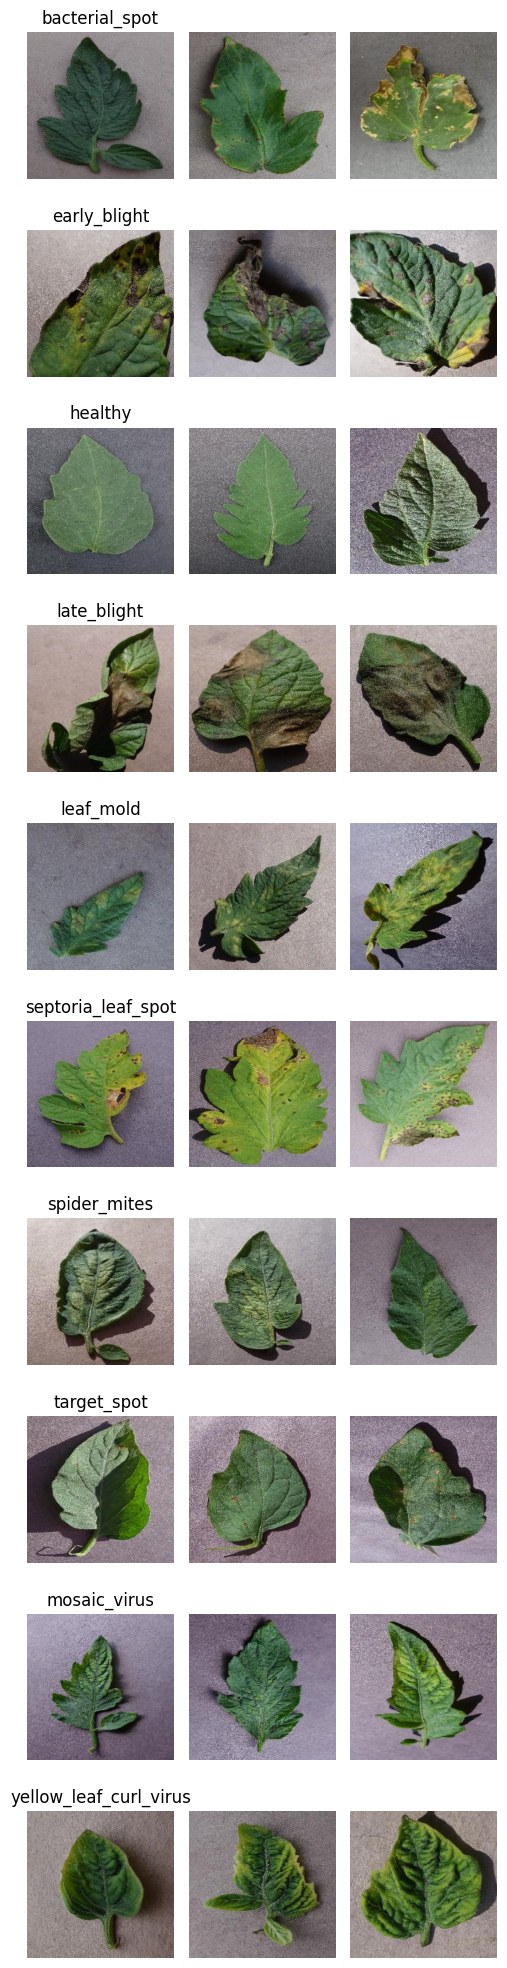

In [76]:
fig, axes = plt.subplots(10, 3, figsize=(5, 20))

for i, folder in enumerate(os.listdir(dir_dataset)):
    folder_path = os.path.join(dir_dataset, folder)
    if os.path.isdir(folder_path):
        for j, file in enumerate(os.listdir(folder_path)[:3]):
            image_path = os.path.join(folder_path, file)
            image = Image.open(image_path)
            
            ax = axes[i, j]
            ax.imshow(image)
            ax.axis('off')  
            if j == 0:
                folder = folder.split("___")[1]
                folder = folder.split(" ")[0]
                folder = folder.replace("Tomato_", "")
                folder = folder.lower()
                ax.set_title(folder)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

df_train = pd.read_excel(r"C:\Users\USER\Desktop\Projects\PASD_Deteksi_Penyakit_Tanaman\Dataset_Classification\split\train.xlsx")
df_test = pd.read_excel(r"C:\Users\USER\Desktop\Projects\PASD_Deteksi_Penyakit_Tanaman\Dataset_Classification\split\test.xlsx")
df_val = pd.read_excel(r"C:\Users\USER\Desktop\Projects\PASD_Deteksi_Penyakit_Tanaman\Dataset_Classification\split\val.xlsx")

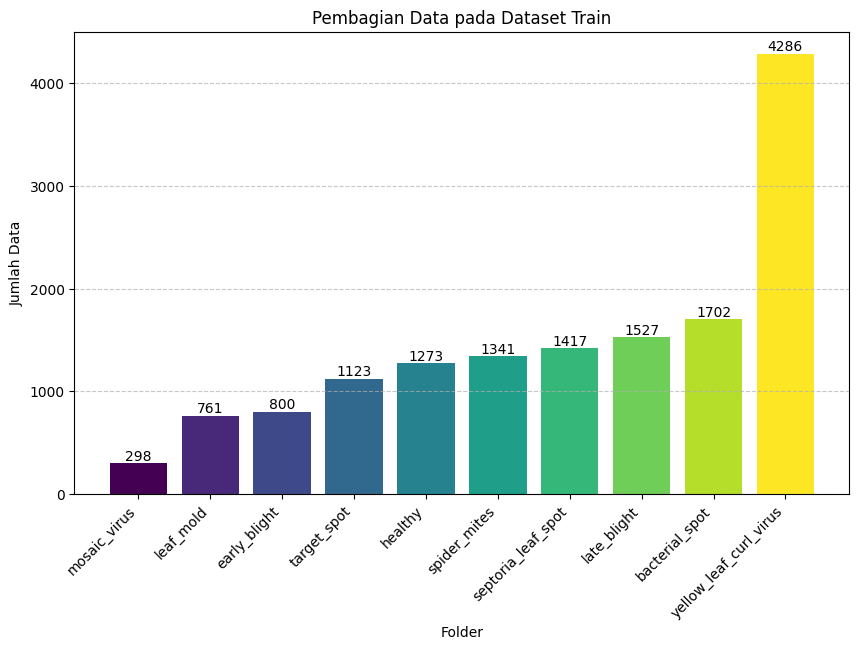

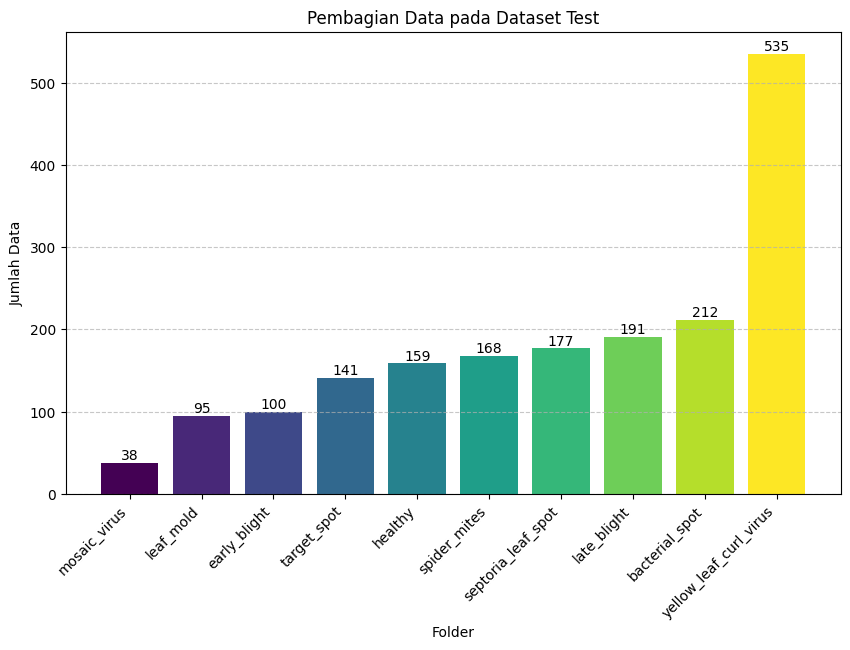

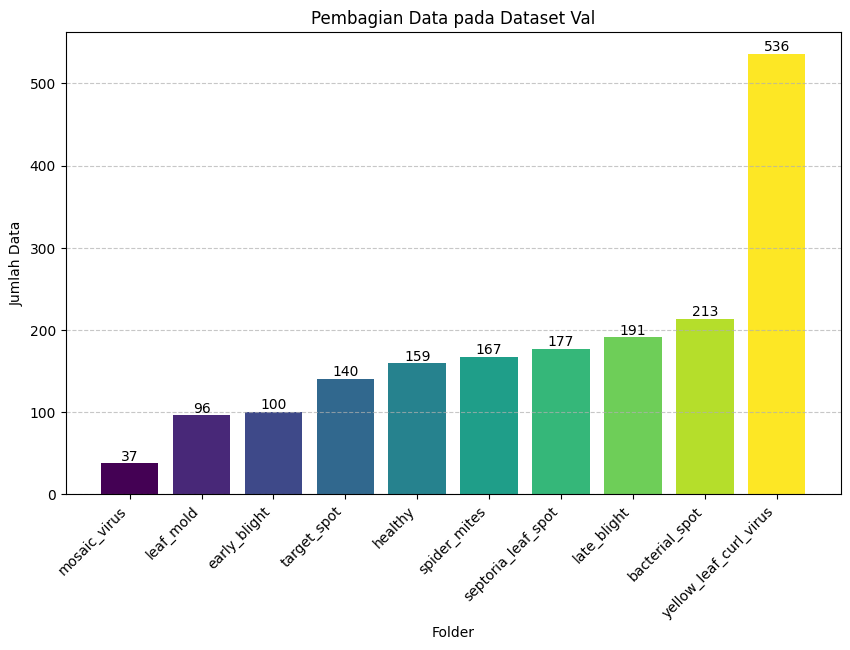

In [11]:
import numpy as np
from matplotlib import pyplot as plt

for df in [df_train, df_test, df_val]:
    folder_counts = df['label'].value_counts()
    folders = folder_counts.index
    folders = [folder.split("___")[1] for folder in folders]
    folders = [folder.split(" ")[0] for folder in folders]
    folders = [folder.replace("Tomato_", "") for folder in folders]
    folders = [folder.lower() for folder in folders]

    sorted_folders, sorted_file_counts = zip(*sorted(zip(folders, folder_counts), key=lambda x: x[1]))
    colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_folders)))

    plt.figure(figsize=(10, 6))
    bars = plt.bar(sorted_folders, sorted_file_counts, color=colors)

    for bar, count in zip(bars, sorted_file_counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
                 ha='center', va='bottom', fontsize=10)

    plt.xlabel("Folder")
    plt.ylabel("Jumlah Data")
    plt.title(f"Pembagian Data pada Dataset {"Train" if df.equals(df_train) else "Test" if df.equals(df_test) else "Val"}")
    plt.xticks(rotation=45, ha="right")
    # plt.ylim(0, 5000)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

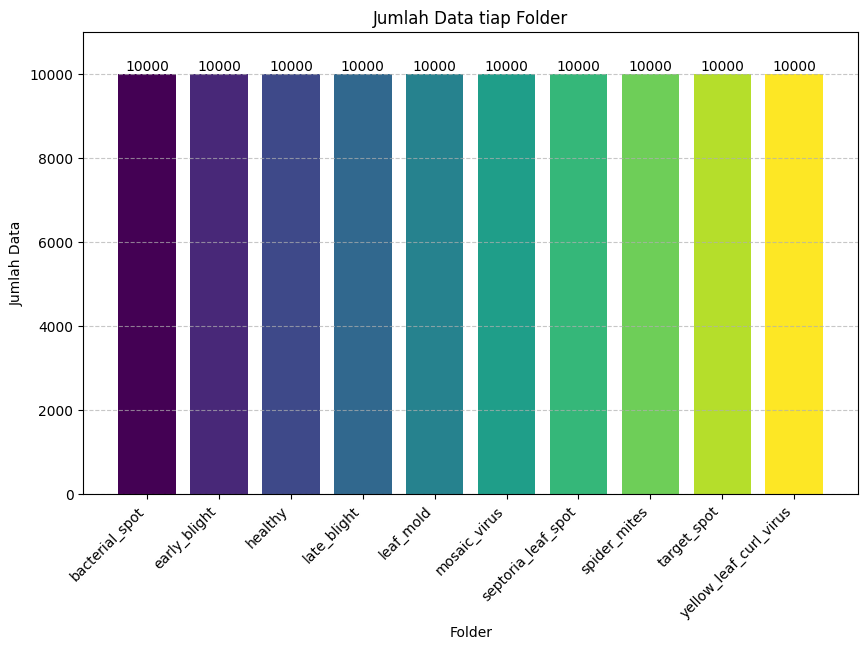

In [ ]:
import os

dir_augment = r"C:\Users\USER\Desktop\Projects\PASD_Deteksi_Penyakit_Tanaman\Dataset_Classification\train_aug"

folders = os.listdir(dir_augment)
file_counts = [len(os.listdir(f"{dir_augment}/{folder}")) for folder in folders]

# folders = [folder.split("___")[1] for folder in folders]
# folders = [folder.split(" ")[0] for folder in folders]
# folders = [folder.replace("Tomato_", "") for folder in folders]
# folders = [folder.lower() for folder in folders]

# Sort folders and file_counts based on file_counts
sorted_folders, sorted_file_counts = zip(*sorted(zip(folders, file_counts), key=lambda x: x[1]))

colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_folders)))

plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_folders, sorted_file_counts, color=colors)

for bar, count in zip(bars, sorted_file_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), 
             ha='center', va='bottom', fontsize=10)

plt.xlabel("Folder")
plt.ylabel("Jumlah Data")
plt.title("Jumlah Data tiap Folder")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 11000)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
Epoch 1/50, Loss: 0.6875, Acc: 0.7654, Val Loss: 0.2302, Val Acc: 0.9152
Epoch 2/50, Loss: 0.3124, Acc: 0.8933, Val Loss: 0.1500, Val Acc: 0.9477
Epoch 3/50, Loss: 0.1867, Acc: 0.9359, Val Loss: 0.1883, Val Acc: 0.9460
Epoch 4/50, Loss: 0.1386, Acc: 0.9526, Val Loss: 0.1811, Val Acc: 0.9488
Epoch 5/50, Loss: 0.1150, Acc: 0.9612, Val Loss: 0.2028, Val Acc: 0.9433
Epoch 6/50, Loss: 0.0972, Acc: 0.9675, Val Loss: 0.2560, Val Acc: 0.9488
Epoch 7/50, Loss: 0.0808, Acc: 0.9723, Val Loss: 0.2461, Val Acc: 0.9482
Epoch 8/50, Loss: 0.0779, Acc: 0.9742, Val Loss: 0.1707, Val Acc: 0.9548
Epoch 9/50, Loss: 0.0665, Acc: 0.9778, Val Loss: 0.2346, Val Acc: 0.9504
Epoch 10/50, Loss: 0.0642, Acc: 0.9787, Val Loss: 0.2336, Val Acc: 0.9526
Epoch 11/50, Loss: 0.0578, Acc: 0.9815, Val Loss: 0.1848, Val Acc: 0.9576
Epoch 12/50, Loss: 0.0546, Acc: 0.9824, Val Loss: 0.2318, Val Acc: 0.9554
Epoch 13/50, Loss: 0.0549, Acc: 0.9825, Val Loss: 0.2356, Val Acc: 0.9499
Epoch 14/50, Loss: 0.0209, Acc: 0.9928, Val Loss: 0.2161, Val Acc: 0.9565
Epoch 15/50, Loss: 0.0146, Acc: 0.9948, Val Loss: 0.2167, Val Acc: 0.9637
Epoch 16/50, Loss: 0.0147, Acc: 0.9950, Val Loss: 0.1939, Val Acc: 0.9615
Epoch 17/50, Loss: 0.0131, Acc: 0.9952, Val Loss: 0.2343, Val Acc: 0.9593
Epoch 18/50, Loss: 0.0124, Acc: 0.9957, Val Loss: 0.2123, Val Acc: 0.9659
Epoch 19/50, Loss: 0.0102, Acc: 0.9965, Val Loss: 0.2113, Val Acc: 0.9648
Epoch 20/50, Loss: 0.0096, Acc: 0.9966, Val Loss: 0.2050, Val Acc: 0.9664
Epoch 21/50, Loss: 0.0094, Acc: 0.9964, Val Loss: 0.2379, Val Acc: 0.9626
Epoch 22/50, Loss: 0.0092, Acc: 0.9968, Val Loss: 0.2162, Val Acc: 0.9653
Epoch 23/50, Loss: 0.0092, Acc: 0.9966, Val Loss: 0.2743, Val Acc: 0.9653
Epoch 24/50, Loss: 0.0096, Acc: 0.9968, Val Loss: 0.2361, Val Acc: 0.9686
Epoch 25/50, Loss: 0.0073, Acc: 0.9975, Val Loss: 0.2429, Val Acc: 0.9692
Epoch 26/50, Loss: 0.0071, Acc: 0.9973, Val Loss: 0.2386, Val Acc: 0.9681
Epoch 27/50, Loss: 0.0070, Acc: 0.9975, Val Loss: 0.2359, Val Acc: 0.9681
Epoch 28/50, Loss: 0.0063, Acc: 0.9978, Val Loss: 0.2427, Val Acc: 0.9686
Epoch 29/50, Loss: 0.0076, Acc: 0.9975, Val Loss: 0.2344, Val Acc: 0.9686
Epoch 30/50, Loss: 0.0070, Acc: 0.9973, Val Loss: 0.2376, Val Acc: 0.9686
Epoch 31/50, Loss: 0.0063, Acc: 0.9978, Val Loss: 0.2525, Val Acc: 0.9675
Epoch 32/50, Loss: 0.0069, Acc: 0.9975, Val Loss: 0.2504, Val Acc: 0.9675
Epoch 33/50, Loss: 0.0060, Acc: 0.9979, Val Loss: 0.2441, Val Acc: 0.9697
Epoch 34/50, Loss: 0.0063, Acc: 0.9977, Val Loss: 0.2475, Val Acc: 0.9675
Epoch 35/50, Loss: 0.0068, Acc: 0.9976, Val Loss: 0.2417, Val Acc: 0.9692
Epoch 36/50, Loss: 0.0062, Acc: 0.9979, Val Loss: 0.2406, Val Acc: 0.9703
Epoch 37/50, Loss: 0.0065, Acc: 0.9977, Val Loss: 0.2414, Val Acc: 0.9692
Epoch 38/50, Loss: 0.0066, Acc: 0.9976, Val Loss: 0.2396, Val Acc: 0.9697
Epoch 39/50, Loss: 0.0061, Acc: 0.9981, Val Loss: 0.2408, Val Acc: 0.9697
Epoch 40/50, Loss: 0.0065, Acc: 0.9976, Val Loss: 0.2407, Val Acc: 0.9703
Epoch 41/50, Loss: 0.0061, Acc: 0.9980, Val Loss: 0.2413, Val Acc: 0.9686
Epoch 42/50, Loss: 0.0066, Acc: 0.9977, Val Loss: 0.2415, Val Acc: 0.9697
Epoch 43/50, Loss: 0.0061, Acc: 0.9978, Val Loss: 0.2403, Val Acc: 0.9703
Epoch 44/50, Loss: 0.0063, Acc: 0.9980, Val Loss: 0.2415, Val Acc: 0.9703
Epoch 45/50, Loss: 0.0058, Acc: 0.9979, Val Loss: 0.2432, Val Acc: 0.9697
Epoch 46/50, Loss: 0.0061, Acc: 0.9978, Val Loss: 0.2412, Val Acc: 0.9703
Epoch 47/50, Loss: 0.0059, Acc: 0.9979, Val Loss: 0.2412, Val Acc: 0.9703
Epoch 48/50, Loss: 0.0057, Acc: 0.9980, Val Loss: 0.2413, Val Acc: 0.9703
Epoch 49/50, Loss: 0.0064, Acc: 0.9976, Val Loss: 0.2413, Val Acc: 0.9703
Epoch 50/50, Loss: 0.0058, Acc: 0.9980, Val Loss: 0.2414, Val Acc: 0.9703

In [ ]:
0.6875, 0.3124, 0.1867, 0.1386, 0.1150, 0.0972, 0.0808, 0.0779, 0.0665, 0.0642, 0.0578, 0.0546, 0.0549, 0.0209, 0.0146, 0.0147, 0.0131, 0.0124, 0.0102, 0.0096, 0.0094, 0.0092, 0.0092, 0.0096, 0.0073, 0.0071, 0.0070, 0.0063, 0.0076, 0.0070, 0.0063, 0.0069, 0.0060, 0.0063, 0.0068, 0.0062, 0.0065, 0.0066, 0.0061, 0.0065, 0.0061, 0.0066, 0.0061, 0.0063, 0.0058, 0.0061, 0.0059, 0.0057, 0.0064, 0.0058
0.7654, 0.8933, 0.9359, 0.9526, 0.9612, 0.9675, 0.9723, 0.9742, 0.9778, 0.9787, 0.9815, 0.9824, 0.9825, 0.9928, 0.9948, 0.9950, 0.9952, 0.9957, 0.9965, 0.9966, 0.9964, 0.9968, 0.9966, 0.9968, 0.9975, 0.9973, 0.9975, 0.9978, 0.9975, 0.9973, 0.9978, 0.9975, 0.9979, 0.9977, 0.9976, 0.9979, 0.9977, 0.9976, 0.9981, 0.9976, 0.9980, 0.9977, 0.9978, 0.9980, 0.9979, 0.9978, 0.9979, 0.9980, 0.9976, 0.9980
0.2302, 0.1500, 0.1883, 0.1811, 0.2028, 0.2560, 0.2461, 0.1707, 0.2346, 0.2336, 0.1848, 0.2318, 0.2356, 0.2161, 0.2167, 0.1939, 0.2343, 0.2123, 0.2113, 0.2050, 0.2379, 0.2162, 0.2743, 0.2361, 0.2429, 0.2386, 0.2359, 0.2427, 0.2344, 0.2376, 0.2525, 0.2504, 0.2441, 0.2475, 0.2417, 0.2406, 0.2414, 0.2396, 0.2408, 0.2407, 0.2413, 0.2415, 0.2403, 0.2415, 0.2432, 0.2412, 0.2412, 0.2413, 0.2413, 0.2414
0.9152, 0.9477, 0.9460, 0.9488, 0.9433, 0.9488, 0.9482, 0.9548, 0.9504, 0.9526, 0.9576, 0.9554, 0.9499, 0.9565, 0.9637, 0.9615, 0.9593, 0.9659, 0.9648, 0.9664, 0.9626, 0.9653, 0.9653, 0.9686, 0.9692, 0.9681, 0.9681, 0.9686, 0.9686, 0.9686, 0.9675, 0.9675, 0.9697, 0.9675, 0.9692, 0.9703, 0.9692, 0.9697, 0.9697, 0.9703, 0.9686, 0.9697, 0.9703, 0.9703, 0.9697, 0.9703, 0.9703, 0.9703, 0.9703, 0.9703

50 50 50 50


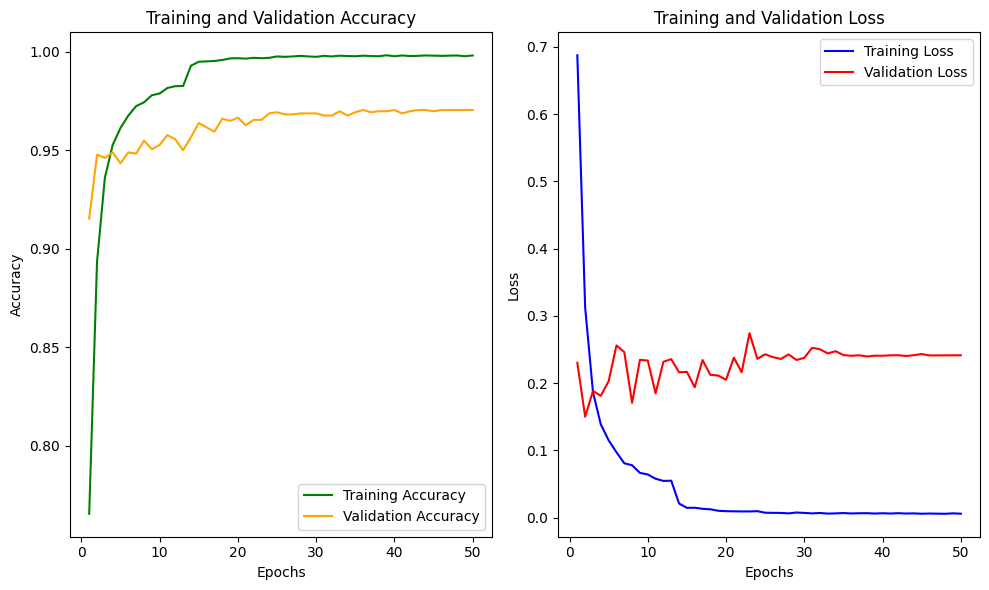

In [ ]:
import matplotlib.pyplot as plt


epochs = list(range(1, 51))
train_loss = [0.6875, 0.3124, 0.1867, 0.1386, 0.1150, 0.0972, 0.0808, 0.0779, 0.0665, 0.0642, 0.0578, 0.0546, 0.0549, 0.0209, 0.0146, 0.0147, 0.0131, 0.0124, 0.0102, 0.0096, 0.0094, 0.0092, 0.0092, 0.0096, 0.0073, 0.0071, 0.0070, 0.0063, 0.0076, 0.0070, 0.0063, 0.0069, 0.0060, 0.0063, 0.0068, 0.0062, 0.0065, 0.0066, 0.0061, 0.0065, 0.0061, 0.0066, 0.0061, 0.0063, 0.0058, 0.0061, 0.0059, 0.0057, 0.0064, 0.0058]
train_acc = [0.7654, 0.8933, 0.9359, 0.9526, 0.9612, 0.9675, 0.9723, 0.9742, 0.9778, 0.9787, 0.9815, 0.9824, 0.9825, 0.9928, 0.9948, 0.9950, 0.9952, 0.9957, 0.9965, 0.9966, 0.9964, 0.9968, 0.9966, 0.9968, 0.9975, 0.9973, 0.9975, 0.9978, 0.9975, 0.9973, 0.9978, 0.9975, 0.9979, 0.9977, 0.9976, 0.9979, 0.9977, 0.9976, 0.9981, 0.9976, 0.9980, 0.9977, 0.9978, 0.9980, 0.9979, 0.9978, 0.9979, 0.9980, 0.9976, 0.9980]
val_loss = [0.2302, 0.1500, 0.1883, 0.1811, 0.2028, 0.2560, 0.2461, 0.1707, 0.2346, 0.2336, 0.1848, 0.2318, 0.2356, 0.2161, 0.2167, 0.1939, 0.2343, 0.2123, 0.2113, 0.2050, 0.2379, 0.2162, 0.2743, 0.2361, 0.2429, 0.2386, 0.2359, 0.2427, 0.2344, 0.2376, 0.2525, 0.2504, 0.2441, 0.2475, 0.2417, 0.2406, 0.2414, 0.2396, 0.2408, 0.2407, 0.2413, 0.2415, 0.2403, 0.2415, 0.2432, 0.2412, 0.2412, 0.2413, 0.2413, 0.2414]
val_acc = [0.9152, 0.9477, 0.9460, 0.9488, 0.9433, 0.9488, 0.9482, 0.9548, 0.9504, 0.9526, 0.9576, 0.9554, 0.9499, 0.9565, 0.9637, 0.9615, 0.9593, 0.9659, 0.9648, 0.9664, 0.9626, 0.9653, 0.9653, 0.9686, 0.9692, 0.9681, 0.9681, 0.9686, 0.9686, 0.9686, 0.9675, 0.9675, 0.9697, 0.9675, 0.9692, 0.9703, 0.9692, 0.9697, 0.9697, 0.9703, 0.9686, 0.9697, 0.9703, 0.9703, 0.9697, 0.9703, 0.9703, 0.9703, 0.9703, 0.9703]

print(len(train_loss), len(train_acc), len(val_loss), len(val_acc))

plt.figure(figsize=(10, 6))


plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Training Accuracy', color='green')
plt.plot(epochs, val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()